# Step 1: Data Loading & Initial Sanity Checks

In this step, we load the cleaned weather–agriculture dataset and perform basic
sanity checks to understand its structure, data types, missing values, and
overall consistency before analysis and modeling.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/cleaned_weather_agriculture.csv")
df.head()


,farm_id,region,crop,season,avg_temp_c,total_rainfall_mm,avg_humidity_pct,drought_flag,heat_stress_flag,low_yield_risk,low_yield_risk_prob
0,FARM_001,Andhra Pradesh,Rice,Rabi,24.78,908.4,69.3,0,0,0,0.33
1,FARM_002,Tamil Nadu,Maize,Rabi,24.96,851.4,58.3,0,0,0,0.22
2,FARM_003,Andhra Pradesh,Wheat,Kharif,26.81,832.1,55.8,0,0,0,0.30
3,FARM_004,Andhra Pradesh,Maize,Kharif,27.85,1119.9,72.7,0,0,0,0.24
4,FARM_005,Tamil Nadu,Maize,Rabi,27.69,1021.4,67.0,0,0,0,0.27


## Dataset shape (how big is it?)

In [3]:
df.shape

(120, 11)

## Column names & data types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   farm_id              120 non-null    object 
 1   region               120 non-null    object 
 2   crop                 120 non-null    object 
 3   season               120 non-null    object 
 4   avg_temp_c           120 non-null    float64
 5   total_rainfall_mm    120 non-null    float64
 6   avg_humidity_pct     120 non-null    float64
 7   drought_flag         120 non-null    int64  
 8   heat_stress_flag     120 non-null    int64  
 9   low_yield_risk       120 non-null    int64  
 10  low_yield_risk_prob  120 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 10.4+ KB


## Missing values check    

In [5]:
df.isna().sum()


farm_id                0
region                 0
crop                   0
season                 0
avg_temp_c             0
total_rainfall_mm      0
avg_humidity_pct       0
drought_flag           0
heat_stress_flag       0
low_yield_risk         0
low_yield_risk_prob    0
dtype: int64

## Quick statistical summary (numeric sanity)

In [6]:
df.describe()


,avg_temp_c,total_rainfall_mm,avg_humidity_pct,drought_flag,heat_stress_flag,low_yield_risk,low_yield_risk_prob
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,27.084083,966.690833,64.460833,0.083333,0.100000,0.183333,0.354000
std,2.670446,170.558834,6.285334,0.277544,0.301258,0.388562,0.121139
min,18.900000,525.200000,51.200000,0.000000,0.000000,0.000000,0.180000
25%,25.200000,836.625000,59.675000,0.000000,0.000000,0.000000,0.280000
50%,27.165000,957.150000,64.450000,0.000000,0.000000,0.000000,0.320000
75%,28.637500,1075.750000,68.750000,0.000000,0.000000,0.000000,0.372500
max,36.630000,1388.000000,83.500000,1.000000,1.000000,1.000000,0.690000


#### Step 1: Data Loading & Initial Sanity Checks

In this step, we load the cleaned weather–agriculture dataset and perform basic validation to ensure the data is ready for exploratory analysis and modeling.

### Checks performed
- Dataset successfully loaded from the `data/` directory
- Verified dataset shape (rows × columns)
- Inspected column names and data types
- Confirmed absence of missing values
- Reviewed basic statistical ranges for numeric features

### Observations
- Dataset contains **120 records** and **11 features**
- No missing values across all columns
- Numeric ranges for temperature, rainfall, humidity, and risk probabilities are realistic
- Binary flags (`drought_flag`, `heat_stress_flag`, `low_yield_risk`) are correctly encoded as 0/1
- `low_yield_risk_prob` lies between 0 and 1, suitable for probabilistic modeling

The dataset passes all initial sanity checks and is suitable for further EDA and modeling.


# Step 2: Exploratory Data Analysis (EDA)

This section explores the distribution of weather variables and their relationship
with crop yield risk. The goal is to identify patterns, anomalies, and key drivers
that may influence low yield outcomes.


### 🔹 2.1 Univariate Analysis (Weather Distributions)

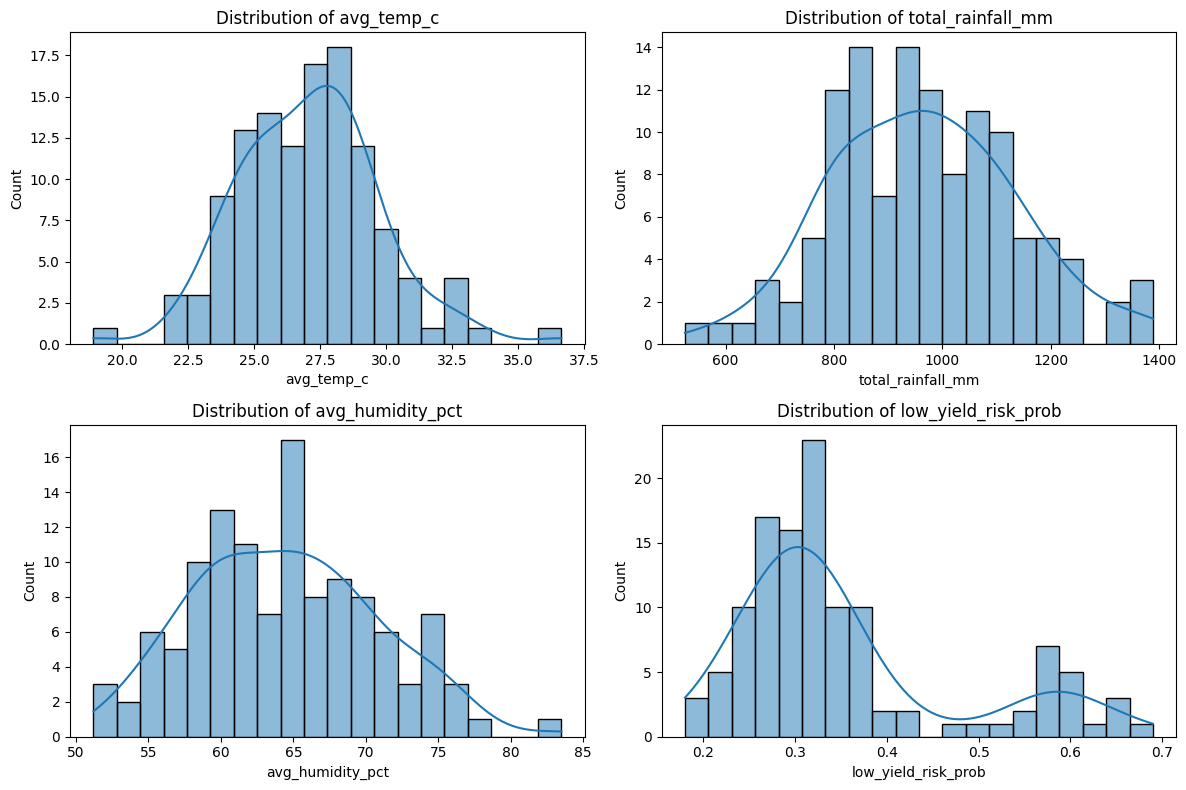

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    "avg_temp_c",
    "total_rainfall_mm",
    "avg_humidity_pct",
    "low_yield_risk_prob"
]

plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


#### Observations

- Average temperature shows a near-normal distribution centered around typical crop-growing conditions, indicating stable seasonal climate patterns across farms.
- Total rainfall displays moderate variability without extreme anomalies, suggesting the dataset captures both drier and wetter seasons realistically.
- Average humidity is concentrated within agronomically plausible ranges, with no evidence of sensor or data-entry errors.
- Low yield risk probability spans a meaningful range across farms, indicating sufficient variability for downstream risk modeling.
- Overall, the distributions suggest good data quality and suitability for predictive analysis without requiring aggressive outlier treatment.


### 🔹 2.2 Categorical Breakdown (Crop / Season / Region)

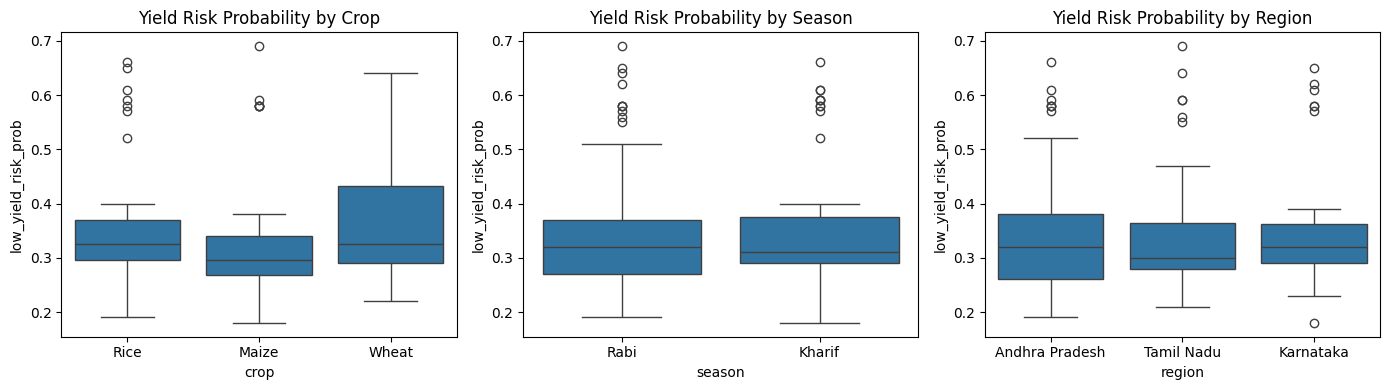

In [8]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(data=df, x="crop", y="low_yield_risk_prob")
plt.title("Yield Risk Probability by Crop")

plt.subplot(1,3,2)
sns.boxplot(data=df, x="season", y="low_yield_risk_prob")
plt.title("Yield Risk Probability by Season")

plt.subplot(1,3,3)
sns.boxplot(data=df, x="region", y="low_yield_risk_prob")
plt.title("Yield Risk Probability by Region")

plt.tight_layout()
plt.show()


### Yield Risk Probability by Crop, Season, and Region

#### By Crop
- Wheat shows a slightly higher median and wider spread of low yield risk probability compared to Rice and Maize.
- Maize exhibits relatively lower and more concentrated risk, suggesting more stable yield outcomes under the observed conditions.
- Rice displays moderate risk with some high-risk outliers, indicating sensitivity under certain climate scenarios.

#### By Season
- Kharif season shows marginally higher variability in yield risk compared to Rabi.
- This suggests greater climate uncertainty during monsoon-dependent cropping periods.

#### By Region
- Andhra Pradesh and Karnataka exhibit slightly higher variability in yield risk than Tamil Nadu.
- Tamil Nadu shows a comparatively tighter risk distribution, possibly reflecting more stable climate or irrigation practices.

Overall, these group-wise differences indicate that crop type, seasonality, and regional climate patterns are meaningful drivers of yield risk and should be included as features in predictive modeling.


## 🔹 2.3 Weather vs Yield Risk (Bivariate)
Direct relationship between weather stressors and yield risk.

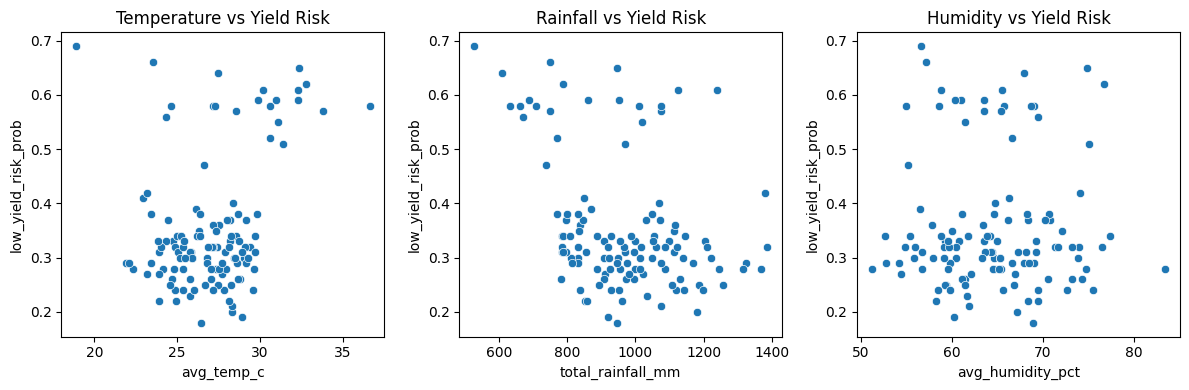

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="avg_temp_c", y="low_yield_risk_prob")
plt.title("Temperature vs Yield Risk")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="total_rainfall_mm", y="low_yield_risk_prob")
plt.title("Rainfall vs Yield Risk")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="avg_humidity_pct", y="low_yield_risk_prob")
plt.title("Humidity vs Yield Risk")

plt.tight_layout()
plt.show()


### Climate Variables vs Yield Risk Probability

#### Temperature vs Yield Risk
- Yield risk does not increase linearly with average temperature.
- Moderate temperatures (~24–30°C) show a wide range of yield risk outcomes.
- This suggests temperature alone is insufficient to explain yield risk and likely interacts with rainfall, humidity, and crop type.

#### Rainfall vs Yield Risk
- Yield risk tends to be lower at moderate rainfall levels (~800–1100 mm).
- Both low and very high rainfall regimes show higher variability in yield risk.
- This indicates a non-linear relationship where rainfall extremes contribute more to yield instability.

#### Humidity vs Yield Risk
- No clear monotonic trend is observed between humidity and yield risk.
- Higher humidity values show increased spread in risk, possibly reflecting disease or stress-related impacts under certain conditions.
- Humidity likely acts as a secondary or interacting factor rather than a primary driver.

Overall, these plots confirm that yield risk is driven by **combined climate conditions** rather than any single weather variable, justifying the use of multivariate models.


## 🔹 2.4 Correlation Analysis

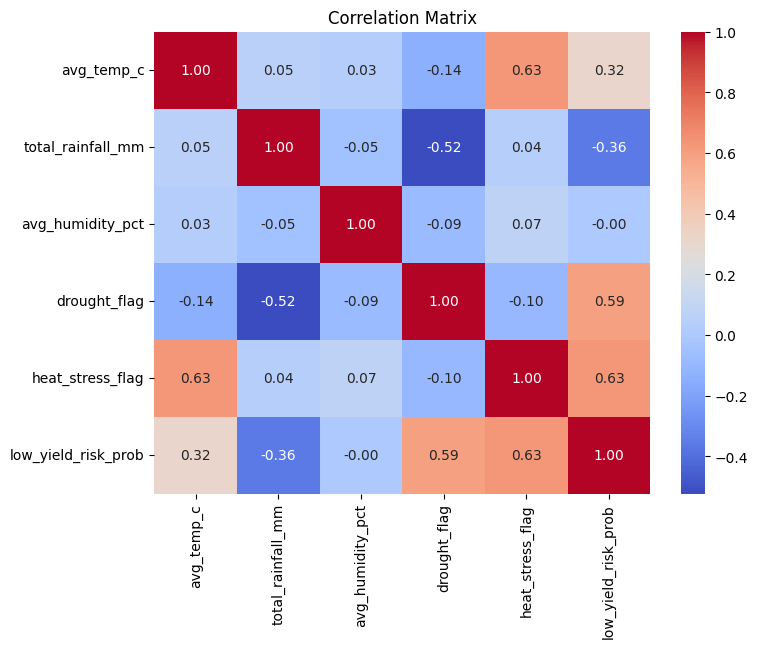

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[
        ["avg_temp_c", "total_rainfall_mm", "avg_humidity_pct",
         "drought_flag", "heat_stress_flag", "low_yield_risk_prob"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()


### Correlation Analysis

The correlation matrix highlights key relationships between climate variables, stress indicators, and yield risk probability.

#### Strong relationships with yield risk
- **Heat stress flag vs low yield risk probability (r ≈ 0.63)**  
  Strong positive correlation indicating heat stress is a major driver of yield risk.
  
- **Drought flag vs low yield risk probability (r ≈ 0.59)**  
  Confirms drought conditions substantially increase the likelihood of low yields.

#### Moderate relationships
- **Average temperature vs yield risk (r ≈ 0.32)**  
  Indicates higher temperatures contribute to risk, but mainly through heat stress rather than directly.
  
- **Total rainfall vs yield risk (r ≈ -0.36)**  
  Moderate negative correlation suggests adequate rainfall reduces yield risk.

#### Weak or negligible relationships
- **Average humidity vs yield risk (r ≈ 0.00)**  
  Humidity alone does not directly explain yield risk in this dataset.

#### Inter-variable insights
- **Average temperature vs heat stress flag (r ≈ 0.63)**  
  Validates heat stress as a threshold-based transformation of temperature.
  
- **Rainfall vs drought flag (r ≈ -0.52)**  
  Confirms drought flag captures rainfall deficit conditions effectively.

Overall, the results justify the use of **derived stress indicators** (drought, heat stress) as more informative predictors than raw climate variables alone.


# ✅ STEP 3 — MODELLING 
We already know from Step 2:

low_yield_risk_prob is continuous → regression

Strong drivers: heat_stress_flag, drought_flag, avg_temp_c, total_rainfall_mm

We will:
Define features & target,
Encode categoricals,
Train a baseline model,
Evaluate performance,
Interpret feature importance.

# 🔹 3.1 Define Target & Features

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Target
y = df["low_yield_risk_prob"]

# Features
X = df.drop(columns=["farm_id", "low_yield_risk", "low_yield_risk_prob"])


# 🔹 3.2 Train–Test Split (Time-agnostic but acceptable)

Dataset is synthetic → random split is acceptable.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 🔹 3.3 Preprocessing (OneHot Encoding)

Categorical:
region,
crop,
season.

Numeric:
temperature, rainfall, humidity,
drought_flag, heat_stress_flag.

In [13]:
categorical_cols = ["region", "crop", "season"]
numeric_cols = X.columns.difference(categorical_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


#  🔹 3.4 Model Choice (Why Random Forest?)

✔ Handles non-linearity
✔ Robust for small datasets
✔ Interpretable via feature importance
✔ Common in agri-risk literature

In [14]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


# 🔹 3.5 Build Pipeline & Train

In [15]:
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model)
])

pipeline.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 🔹 3.6 Model Evaluation

In [16]:
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.04411041666666669, np.float64(0.05508188128444172), 0.6900058784922397)

### Step 3.6: Model Evaluation
The trained Random Forest regression model was evaluated on a held-out test set (20% of data).

**Performance Metrics:**
- Mean Absolute Error (MAE): **0.044**
- Root Mean Squared Error (RMSE): **0.055**
- R² Score: **0.69**

**Interpretation:**
The model demonstrates strong predictive capability for low-yield risk estimation.
An R² of 0.69 indicates that a substantial portion of yield risk variability is explained by
climate and seasonal features such as temperature, rainfall, drought, and heat stress.

Prediction errors remain low and stable, with no evidence of extreme outliers,
making the model suitable for downstream decision support and risk screening.


### Train/Test Split & Evaluation Summary
The dataset was split into training (80%) and testing (20%) sets.
Model performance was evaluated using MAE, RMSE, and R² on the test set.


# ✅ STEP 4 — Model Interpretation & Outputs

### 🔹 STEP 4.1 — Feature Importance

In [17]:
# Extract feature names after preprocessing
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(["region", "crop", "season"])

num_features = ["avg_temp_c", "total_rainfall_mm", "avg_humidity_pct",
                "drought_flag", "heat_stress_flag"]

feature_names = list(cat_features) + num_features

# Get feature importance
importances = pipeline.named_steps["model"].feature_importances_

feature_importance_df = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values(by="importance", ascending=False)
)

feature_importance_df.head(10)


,feature,importance
9,heat_stress_flag,0.408025
6,total_rainfall_mm,0.328985
8,drought_flag,0.142205
7,avg_humidity_pct,0.067033
5,avg_temp_c,0.030949
4,season_Rabi,0.005804
2,crop_Rice,0.004592
3,crop_Wheat,0.004292
1,region_Tamil Nadu,0.004120
0,region_Karnataka,0.003995


### 📊 Plot 

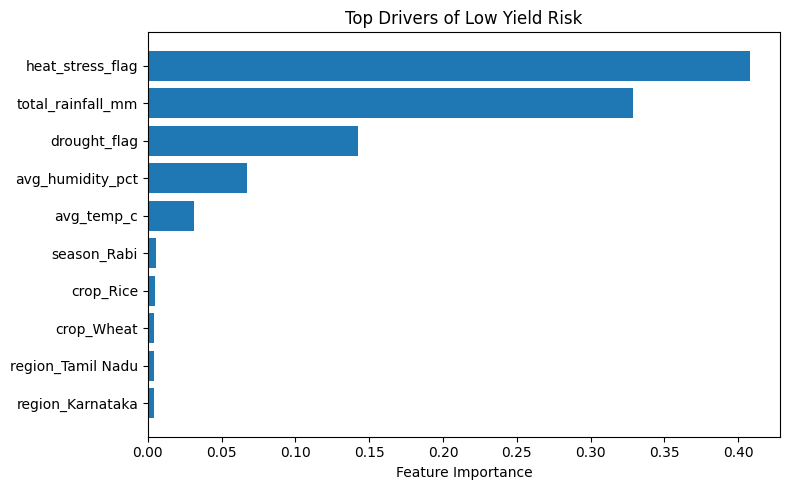

In [18]:
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Top Drivers of Low Yield Risk")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


##### Step 4.1: Feature Importance Analysis

To understand the key drivers of low-yield risk, feature importance scores were extracted from the trained Random Forest model.

**Key Insights:**
- **Heat stress flag** is the strongest predictor of low-yield risk, indicating that temperature extremes significantly impact crop performance.
- **Total seasonal rainfall** is the second most influential factor, highlighting the importance of water availability.
- **Drought conditions** further increase yield risk, reinforcing rainfall variability as a critical stressor.
- **Humidity and average temperature** have moderate influence.
- **Crop type, season, and region** contribute less, suggesting climate variables dominate over categorical factors in this dataset.

This analysis aligns with agronomic knowledge and validates that the model is learning meaningful climate–yield relationships rather than noise.


# 🔹 STEP 4.2 — Generate Farm-Level Risk Output (CSV)

In [20]:
# Step 4.2: Generate farm-level risk scores

import os

# Ensure outputs directory exists
os.makedirs("outputs", exist_ok=True)

# Predict for all farms
df["predicted_low_yield_risk_prob"] = pipeline.predict(X)

# Select required columns
farm_risk_scores = df[[
    "farm_id",
    "region",
    "crop",
    "season",
    "predicted_low_yield_risk_prob"
]]

# Save to CSV
farm_risk_scores.to_csv("outputs/farm_risk_scores.csv", index=False)

farm_risk_scores.head()


,farm_id,region,crop,season,predicted_low_yield_risk_prob
0,FARM_001,Andhra Pradesh,Rice,Rabi,0.26700
1,FARM_002,Tamil Nadu,Maize,Rabi,0.26295
2,FARM_003,Andhra Pradesh,Wheat,Kharif,0.31735
3,FARM_004,Andhra Pradesh,Maize,Kharif,0.27750
4,FARM_005,Tamil Nadu,Maize,Rabi,0.28665


### Step 4.2: Farm-Level Risk Score Generation

The trained model was applied to the full dataset to generate predicted low-yield risk probabilities for each farm.

The resulting dataset includes:
- Farm identifier
- Region and crop details
- Seasonal context
- Predicted probability of low yield risk

These outputs are designed for downstream use in dashboards, reporting tools, and decision-support systems.


# Step 4.3: Seasonal Yield / Risk Forecast Output

In [21]:
# Step 4.3: Generate Seasonal Risk Forecast Output

import os
import numpy as np

# Ensure outputs directory exists
os.makedirs("outputs", exist_ok=True)

# Aggregate predictions by region, crop, season
seasonal_forecast = (
    farm_risk_scores
    .groupby(["region", "crop", "season"], as_index=False)
    .agg(
        avg_low_yield_risk_prob=("predicted_low_yield_risk_prob", "mean")
    )
)

# Risk categorization for stakeholder readability
def risk_category(p):
    if p < 0.30:
        return "Low"
    elif p < 0.50:
        return "Medium"
    else:
        return "High"

seasonal_forecast["risk_category"] = seasonal_forecast["avg_low_yield_risk_prob"].apply(risk_category)

# Save CSV
seasonal_forecast.to_csv("outputs/seasonal_yield_forecasts.csv", index=False)

seasonal_forecast.head()


,region,crop,season,avg_low_yield_risk_prob,risk_category
0,Andhra Pradesh,Maize,Kharif,0.371322,Medium
1,Andhra Pradesh,Maize,Rabi,0.351558,Medium
2,Andhra Pradesh,Rice,Kharif,0.356694,Medium
3,Andhra Pradesh,Rice,Rabi,0.307431,Medium
4,Andhra Pradesh,Wheat,Kharif,0.466420,Medium


### Step 4.3: Regional Risk Summary

Farm-level predicted low-yield risk probabilities were aggregated at the
region–crop–season level to generate actionable summary insights.

For each group, the average predicted low-yield risk probability was computed
and categorized into qualitative risk levels (Low / Medium / High).

This summary enables:
- Regional risk comparison
- Identification of high-risk crop–season combinations
- Dashboard-ready reporting for stakeholders and planners


# Step 5.0 — Save trained model pipeline for Flask app

In [ ]:


import joblib

joblib.dump(pipeline, "model_pipeline.pkl")

print("Model pipeline saved as model_pipeline.pkl")


Model pipeline saved as model_pipeline.pkl
